# AutoPocket

_An automated machine learning package for financial analysis_

---


## Table of Contents
1. [Introduction](#introduction)
2. [Installation](#installation)
3. [User Guide](#user-guide)
4. [How It Works](#how-it-works)
   1. [Preprocessing](#preprocessing)
   2. [Algorithms](#algorithms)
      - [Binary Classification](#binary-classification)
      - [Regression](#regression)
   3. [Postprocessing](#postprocessing)
5. [What Do We Do Better Than Competition?](#what-do-we-do-better-than-competition)
6. [Dependencies](#dependencies)


## 🌟 Introduction
This Python package helps users to quickly develop binary classification or regression models for financial data. It supports raw tabular data and provides comprehensive explanation of chosen algorithm.

### Target User Group (3pkt)
### Tool Specialization (4pkt)
### What do we do better than competition? Overview of Existing Solutions (8pkt)

### Comparison: Autopocket vs MLJAR and AutoGluon

In this section, we compare the functionality and benefits of Autopocket against two popular AutoML frameworks: **MLJAR** and **AutoGluon**. While each of these tools excels in specific areas, Autopocket introduces several unique advantages tailored for financial data analysis and model interpretability.

---

#### 1. **Core Features**

| Feature                          | Autopocket                  | MLJAR (mode Explain)                            | AutoGluon (preset Medium Quality)                     |
|----------------------------------|--------------------------------|-----------------------------------|---------------------------------|
| **Model Types**                  | Supports explainable models like RandomForest, LogisticRegression, and DecisionTree. | Wide variety including ensembles, neural networks, etc. | Extensive set of models including XGBoost, CatBoost, and neural networks. |
| **Interpretability**             | Strong focus: SHAP, LIME, ICE, PDP. | SHAP support + learning curves. | Some SHAP support, but limited to computing feature importances, no plots generated. |
| **Optimization Strategy**        | Fine-tuning via RandomizedSearchCV with 5-fold cross-validation. | Automatic tuning with minimal user control. | Multi-level ensembling and stacking. |
| **Custom Preprocessing**         | Handles financial-specific issues (e.g., decimal separators, date formats). | General preprocessing pipeline. | Generic preprocessing for broader data types. |
| **Explanations and Visualizations** | Detailed explanations using LIME, SHAP, and dependency plots. | Limited visual explanations. | Focus on performance metrics; fewer visualizations. |
| **Output Format**                | Saves results in structured PDFs and JSON for further analysis, displaying some of the plots in Jupyter notebook cell. | Primarily charts saved in .png and .json files. | Emphasis on leaderboard-style reporting. |

---

#### 2. **Performance and Usability**

| Feature                          | Autopocket                  | MLJAR (mode Explain)                            | AutoGluon (preset Medium Quality)                     |
|----------------------------------|--------------------------------|-----------------------------------|---------------------------------|
| **Ease of Use**                  | Very simple API: `doJob()` handles the entire pipeline. | User-friendly, but requires configuration for interpretability. | High automation, but API can be complex for customization. |
| **Performance Metrics**          | Customizable metrics with financial relevance (e.g., gini for binary classification). | Predefined metrics for general-purpose tasks. | Comprehensive leaderboard with multiple metrics. |
| **Execution Time**               | Focuses on explainable models, trading speed for interpretability. | Fast due to Optuna optimization | Fast with multi-threaded optimization|

---

#### 3. **Comparison by example on dataset credit.csv**

**Training restricted to tree-based and linear models due to banking regulations (no boostings)**

##### Autopocket:
- **Models Trained**: RandomForestClassifier, LogisticRegression, DecisionTreeClassifier, RidgeClassifier.
- **Best Model Score**: RandomForestClassifier with 0.8387 roc-auc.
- **Key Strengths**: Comprehensive interpretability via LIME and SHAP. Tailored for financial datasets, offering detailed preprocessing and explanations.
- **Use Case Fit**: Ideal for financial analysts requiring interpretability and actionable insights.

##### MLJAR (mode "Explain"):
- **Models Trained**: Baseline, DecisionTree, RandomForest, and Linear models.
- **Best Model Score**: RandomForest with roc-auc of 0.818378.
- **Key Strengths**: Speed and simplicity. Suitable for regression tasks with quick baseline comparisons.
- **Use Case Fit**: Great for rapid prototyping.

##### AutoGluon:
- **Models Trained**: RandomForestEntr, ExtraTreesEntr, ExtraTreesGini, RandomForestGini
- **Best Model Score**: RandomForestEntr with 0.851 (roc-auc).
- **Key Strengths**: High performance and ensembling. Designed for larger datasets with less concern for interpretability.
- **Use Case Fit**: Preferred for performance-oriented tasks without strict requirements for explanation.

---

#### 4. **Why Autopocket is so unique**

1. **Interpretability First**:
   - Deep integration of SHAP, LIME, ICE, and PDP ensures models are explainable to non-technical stakeholders.
   - Autopocket emphasizes actionable insights and feature impact visualizations.

2. **Tailored for Financial Data**:
   - Handles domain-specific challenges like inconsistent date formats, decimal separators, and outlier detection.
   - Other frameworks offer generic preprocessing but lack domain-specific expertise.

3. **Simplified Workflow**:
   - A single `doJob()` function minimizes complexity while delivering high-quality results.
   - Users benefit from easy-to-understand outputs (PDFs, JSON) for decision-making.

4. **Focused Model Selection**:
   - Uses only interpretable and widely accepted models in the financial domain (e.g., RandomForest, LogisticRegression).
   - Avoids black-box models that are harder to justify in regulated environments.

---

### Conclusion

In a direct comparison on models compliant with the most stringent banking regulations (tree-based and linear models), AutoPocket achieved 2nd place in terms of the roc-auc metric, behind AutoGluon and ahead of MLJAR. While MLJAR and AutoGluon offer fast prototyping and high performance for general machine learning tasks, Autopocket carves out a niche by prioritizing **interpretability**, **financial data handling**, and **domain relevance**. It bridges the gap between performance and actionable insights, making it a valuable tool for financial analysts and decision-makers. 




## 📦 Installation
You can install this package using ``` pypi ```
```python
pip install autopocket
```

## 📖 User guide
The syntax is simple. Just import ```AutoPocketor``` and call ```doJob()``` with your data! For example:
```python
from autopocket.main import AutoPocketor

AutoPocketor().doJob(path = "path/to/your/data.csv", target = "target")
```
Our package will do rest for you

## 🤔 How it works?
We have divided the whole process into three main parts:
* Preprocessing
* Algorithms
* Postprocessing

You can find explanation of each part below:


---

### 🔄 Preprocessing

Preprocessing handles and adjusts data with imperfections such as inconsistent date formats, repetitive patterns, unnecessary spaces, missing data, alternating use of commas and periods as decimal separators, redundant columns, inconsistent binary variable formats, and variations in text case. The preprocessing module is divided into three main components: ```Task Analysis```, ```Data Cleaning``` and ```Feature Processing``` which are described below.  

**`Preprocessor`** is a class that combines **Task Analysis**, **Data Cleaning** and **Feature Processing** into a single workflow.


#### 🔍 Task Analysis

The `task_analysing` module includes **`ColumnTypeAnalyzer`** which is responsible for determining the type of machine learning task: **binary classification** or **linear regression**. Here, too, the target variable is transformed. In the case of **binary classification**, it is transformed to values 0 and 1, while in the case of **linear regression**, it is transformed to have a normal distribution.

#### 🧹 Data Cleaning

The `data_cleaning` module is responsible for handling missing values, correcting data formats, and removing unnecessary or redundant columns.

Tools available in this module:

| Tool                    | Description                                                                 |
|-------------------------|-----------------------------------------------------------------------------|
| `BinaryColumnHandler`   | Ensures consistency in binary column encoding.                              |
| `DataImputer`           | Fills missing values using predefined strategies (mean, median, mode, etc.).|
| `DateHandler`           | Processes date columns, handles different data formats.                     |
| `NumberFormatFixer`     | Fixes inconsistent number formats (e.g., commas vs. periods as separators). |
| `PatternRemover`        | Removes unwanted, repeated patterns.                                        |
| `RedundantColumnRemover`| Identifies and removes redundant columns (e.g., index or same value).       |
| `StringStripper`        | Cleans string columns by removing leading/trailing whitespace.              |
| `StringToLowerConverter`| Converts string data to lowercase for consistency.                          |

All these tools are managed by the `DataCleaner` class, which applies the cleaning steps sequentially.



#### ⚙️ Feature Processing

The `feature_processing` module focuses on transforming the cleaned data into a format suitable for machine learning algorithms. It includes the following tools:

| **Class**           | **Description**                                                                                          |
|---------------------|----------------------------------------------------------------------------------------------------------|
| **`FeatureEncoder`** | Encodes categorical features using one-hot encoding and label encoding for binary features.              |
| **`FeatureSelector`**| Selects relevant features by removing highly correlated ones.                                            |
| **`OutlierHandler`** | Detects and handles outliers using methods like IQR or Isolation Forest.                                  |

The `FeatureProcessor` class manages these steps in data processing.


#### ✨ Example Usage of `Preprocessor`

Below is an example of how to use the `Preprocessor` class to complete preprocessing:

```python
from autopocket.preprocessing.Preprocessor import Preprocessor

# Run preprocessing
X, y, ml_type = Preprocessor().preprocess(path="path/to/your/data.csv", target="your_target_column")
```

#### 📝 Real life example of usage

Below is an example how `Preprocessor` can be used in real life scenario:

In [5]:
!pip install autopocket
import pandas as pd

X = pd.read_csv('data/car_insurance.csv', sep=';') 
X.head(10)

  Using cached autopocket-0.9.0-py3-none-any.whl.metadata (1.1 kB)
Using cached autopocket-0.9.0-py3-none-any.whl (44 kB)


,policy_id,date,age_of_car,area_cluster,fuel_type,max_torque,is_speed_alert,is_claim
0,ID44581,05-02-2010,0.07,C2,Petrol,113Nm@4400rpm,false,0
1,ID11514,12.02.2010,0.09,c14,petrol,91Nm@4250rpm,true,0
2,id55846,19.02.10,"0,07",C3,CNG,60Nm@3500rpm,Yes,0
3,ID29604,6.02.10,0.0,NaN,CNG,60Nm@3500rpm,YES,0
4,ID40201,5.03.2010,"0,08",C8,PETROL,113Nm@4400rpm,0,0
5,ID08498,12/03/2010,0.12,C2,Diesel,250Nm@2750rpm,Yes,0
6,ID34700,9/03/2010,"0,18",c8,Petrol,170Nm@4000rpm,N0,0
7,ID43065,26/03/2010,0.06,C7,Petrol,113Nm@4400rpm,Yes,0
8,ID35759,2 April 2010,NaN,C3,cng,60Nm@3500rpm,1,1
9,ID29374,9 April 10,0.01,C3,CNG,60Nm@3500rpm,YES,0


As we can see, the data is not ready for machine learning algorithms. We can use ```DataCleaner``` from ```Preprocessor``` to prepare it for further analysis.

In [6]:
from autopocket.preprocessing.data_cleaning import DataCleaner

X = DataCleaner().clean(X)
X.head(10)


,date,age_of_car,area_cluster,fuel_type,is_speed_alert,is_claim,max_torque_left,max_torque_right
0,20200205.0,0.070000,2,petrol,0,0,113,44
1,20200212.0,0.090000,14,petrol,1,0,91,425
2,20100219.0,0.070000,3,cng,1,0,60,35
3,20100206.0,0.000000,2,cng,1,0,60,35
4,20200305.0,0.080000,8,petrol,0,0,113,44
5,20200312.0,0.120000,2,diesel,1,0,250,275
6,20200309.0,0.180000,8,petrol,0,0,170,4
7,20200326.0,0.060000,7,petrol,1,0,113,44
8,20200402.0,0.091579,3,cng,1,1,60,35
9,20100409.0,0.010000,3,cng,1,0,60,35


Now the data is ready for further analysis. We can use it to train models.


---

### 🤖 Algorithms

When preprocessinng is done, the ```Modeller``` chooses the set of used models according to recognized task.
We only use those models that are meant to be explainable and are refered to be commonly used in finance. 

We implement estimators form ```scikit-learn``` package

In both cases, we finetune models using ```sklearn.model_selection.RandomizedSearchCV``` (```LassoLarsIC``` and ```LinearRegression``` are tuned using ```sklern.model_selection.GridSearchCV``` because of small hyperparameters space) on 5 folds. We pick number of iterations depending on the model. 

The best model is the one with the highest score in _proper_ metric.

Before starting fitting process, there is information about baseline model score. Baseline (dummy) strategy is chosen depending on the task type. Baseline predicts constant value for every obseravation in the whole dataset and then the score is measured using true target value.

#### 🧩 Binary classification

In this task, we use _roc-auc_ score to measure estimators' performance. 
Baseline predicts the most frequent value present in target value (```y```) for every observation.

We use the following estimators:
* LogisticRegression
* RandomForestClassifier
* RidgeClassifier
* DecisionTreeClassifier


#### 📈 Regression

In this task, we use _negative root mean squared error_ score to measure estimators' performance. 
Baseline predicts mean of target value (```y```) for every observation.

We use the following estimators:
* LinearRegression (implementation od Least Squares)
* Lasso
* Ridge
* DecisionTreeRegression
* RandomForestRegression
* ElasticNet
* LassoLarsIC

Results from this part are saved in ```.json``` files in ```algorithms_results_%Y%m%d_%H%M%S``` directory (where %Y, %m, %d, %H, %M, %S stands for year, month, day ,hour, month, second respectively- the time when you call ```doJob()```). 

User can read results using ```autopocket.algorithms.utils.ResultsReader.results``` into python ```dict```.

### Training aditional models
One may want to fit additional estimators. It is possible by settind ```aditional_estimators``` parameter, which should be a ```list``` of ```EstimatorWrapper```. You can easly create ```EstimatorWrapper``` using ```autopocket.algorithms.base.create_wrapper(estimator, param_distributions, name, n_iter)``` function.

---

### 💡 Postprocessing

The **Postprocessing** module focuses on interpreting and visualizing the results of the best-performing machine learning model. This step provides insights into model behavior, feature importance, and the decisions it makes.

---

#### 📊 LIME Explanations

LIME (Local Interpretable Model-Agnostic Explanations) provides localized explanations for predictions by approximating the model with interpretable surrogates.

| **Function**                         | **Description**                                                                                                    |
|--------------------------------------|--------------------------------------------------------------------------------------------------------------------|
| `explain_top_observations_with_lime` | Generates LIME explanations for the most influential observations.                                                 |
| `lime_summary_plot`                  | Aggregates feature importance from multiple LIME explanations into a global summary plot.                          |
| `top_features_by_lime_importance`    | Selects top uncorrelated features based on LIME feature importance for detailed visualization and model insights.   |

---

#### ✨ SHAP Explanations

SHAP (SHapley Additive exPlanations) is used for interpreting global and local model behavior, leveraging Shapley values.

| **Function**               | **Description**                                                                                       |
|----------------------------|-------------------------------------------------------------------------------------------------------|
| `explain_with_shap`        | Performs a full SHAP analysis, including summary plots, dependence plots, decision plots, and more.    |
| `shap_summary_plot`        | Visualizes global feature importance using SHAP values. The plot highlights which features contribute most to the model's output, based on the magnitude and distribution of SHAP values across all samples.                                               |
| `shap_dependence`          | Displays interactions between features using dependence plots. These plots show the relationship between a feature's value and its SHAP value, revealing potential interactions.                                    |
| `decisions_binary`         | Creates SHAP decision plots for binary classification tasks, focusing on both best and worst decisions. Best decisions correspond to the highest predicted probabilities, while worst decisions have the largest residuals.|
| `decisions_regression`     | Creates SHAP decision plots for regression tasks. The plots identify instances with the highest and lowest residuals to illustrate model performance.                                                     |
| `forceplot_binary`         | Generates SHAP force plots for individual predictions in binary classification. Force plots are created for the observation with the highest probability for class 1 and the observation with the highest probability for class 0, showing local contributions to the prediction.                       |

---

#### 📈 Partial Dependence and ICE Plots

Partial Dependence Plots (PDPs) and Individual Conditional Expectation (ICE) Plots provide visualizations of the relationship between feature values and model predictions. These visualizations help interpret the global and local impacts of features on model predictions.

| **Function**              | **Description**                                                                                               |
|---------------------------|---------------------------------------------------------------------------------------------------------------|
| `generate_pdp`            | Creates Partial Dependence Plots (PDPs) for the selected features, visualizing their average influence on model predictions. By default, the most important, uncorrelated, non-binary features are shown, but user can specify which features should be visualized on plots.
| `generate_ice`            | Produces Individual Conditional Expectation (ICE) plots for visualizing the effect of feature changes on individual predictions. By default, the most important, uncorrelated, non-binary features are shown, but user can specify which features should be visualized on plots. Supports limiting the number of data samples for better visibility. |

These functions include robust error handling to ensure that invalid or unsupported feature names are excluded and provide meaningful feedback to guide users during plot generation.

#### 🏆 Model Leaderboard

This component compares model performance and provides a ranked summary of all evaluated models.

| **Function**       | **Description**                                                                 |
|--------------------|---------------------------------------------------------------------------------|
| `createLeaderBoard`| Reads the saved model results and generates a leaderboard summarizing performance. |

---

This module ensures transparency and interpretability, making the models ready for critical financial decisions.

## 📦 Dependencies

c:\Users\flang\anaconda3\envs\eded\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Performing preprocessing...
X shape: (5859, 62)
Preprocessing done.

Performing modelling...
Performing binary classification
Fitting dummy estimator
Dummy score (strategy: most_frequent): 0.5 roc_auc
Fitting 4 models
1 / 4  | Fitting: RandomForestClassifier. Best score: 0.8385299354082758 roc_auc
2 / 4  | Fitting: LogisticRegression. Using ['lbfgs'] solver.Best score: 0.828229636931441 roc_auc
3 / 4  | Fitting: DecisionTreeClassifier. Best score: 0.7960032445612563 roc_auc
4 / 4  | Fitting: RidgeClassifier. Some models did not converge. Best score: 0.8311035126435768 roc_auc
Saving results to results/algorithms_results
Chosen model: RandomForestClassifier
Modelling done.

Performing postprocessing...
   position              model_name     score                                                                                                                                                                                  params
2         1  RandomForestClassifier  0.838530              

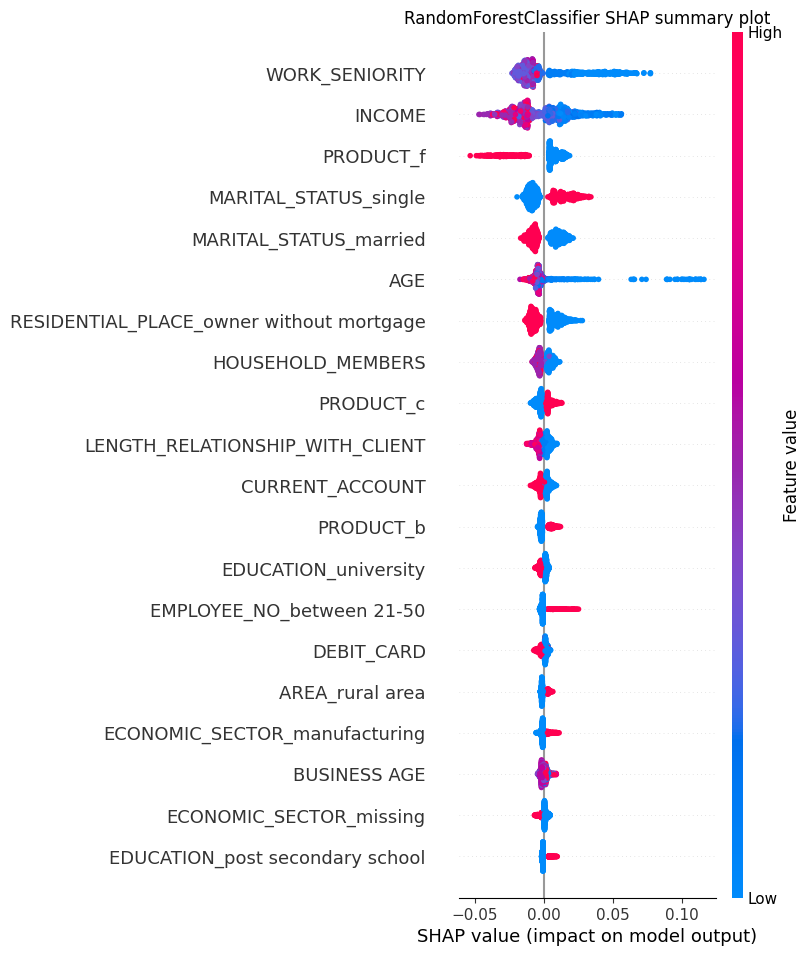

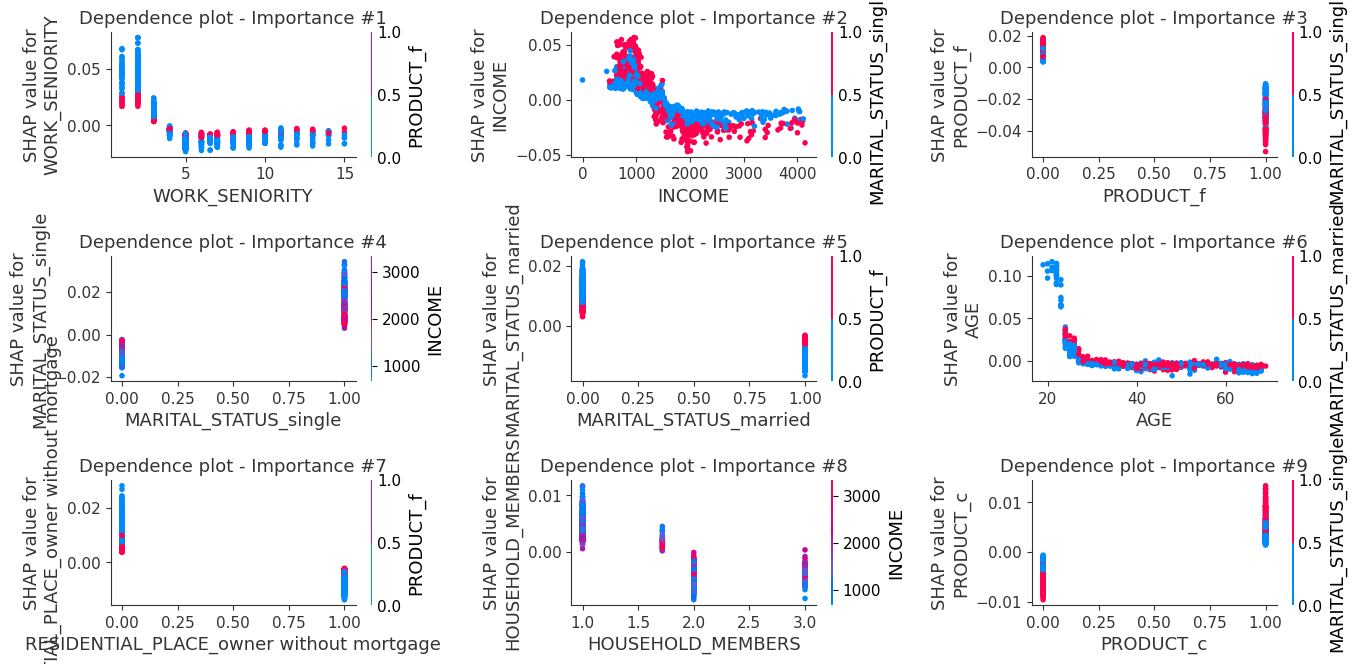

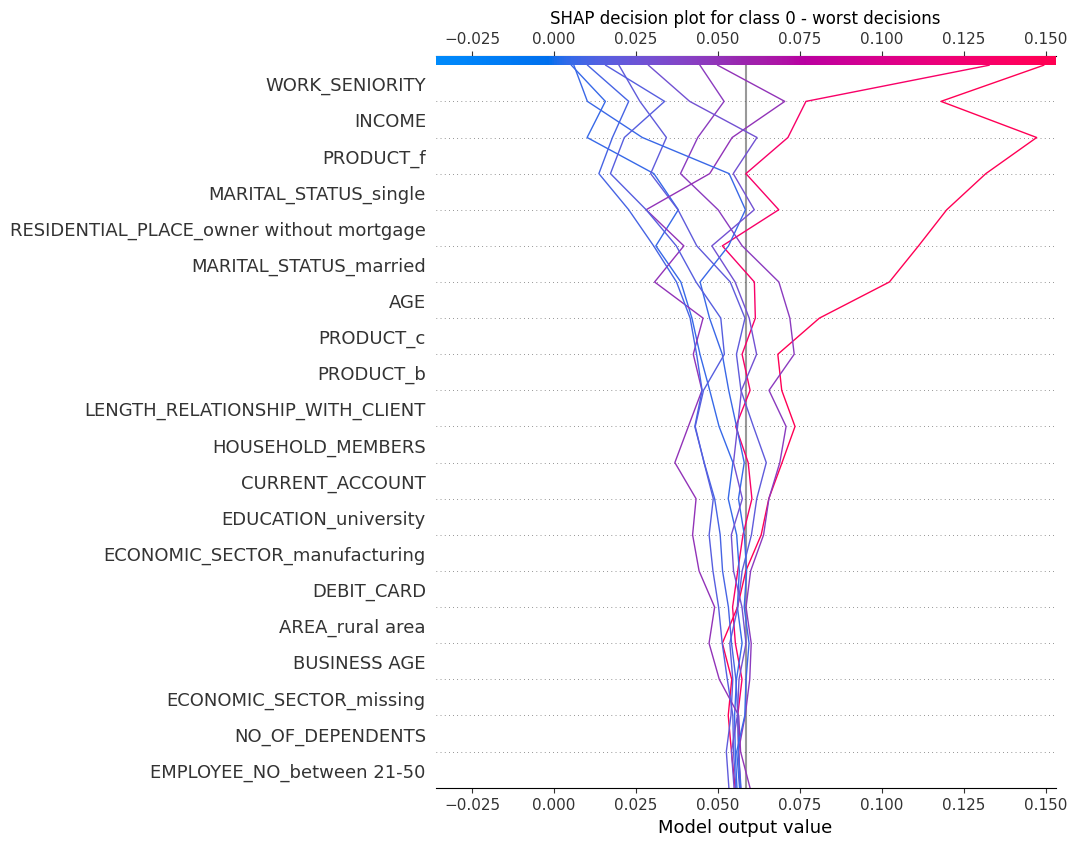

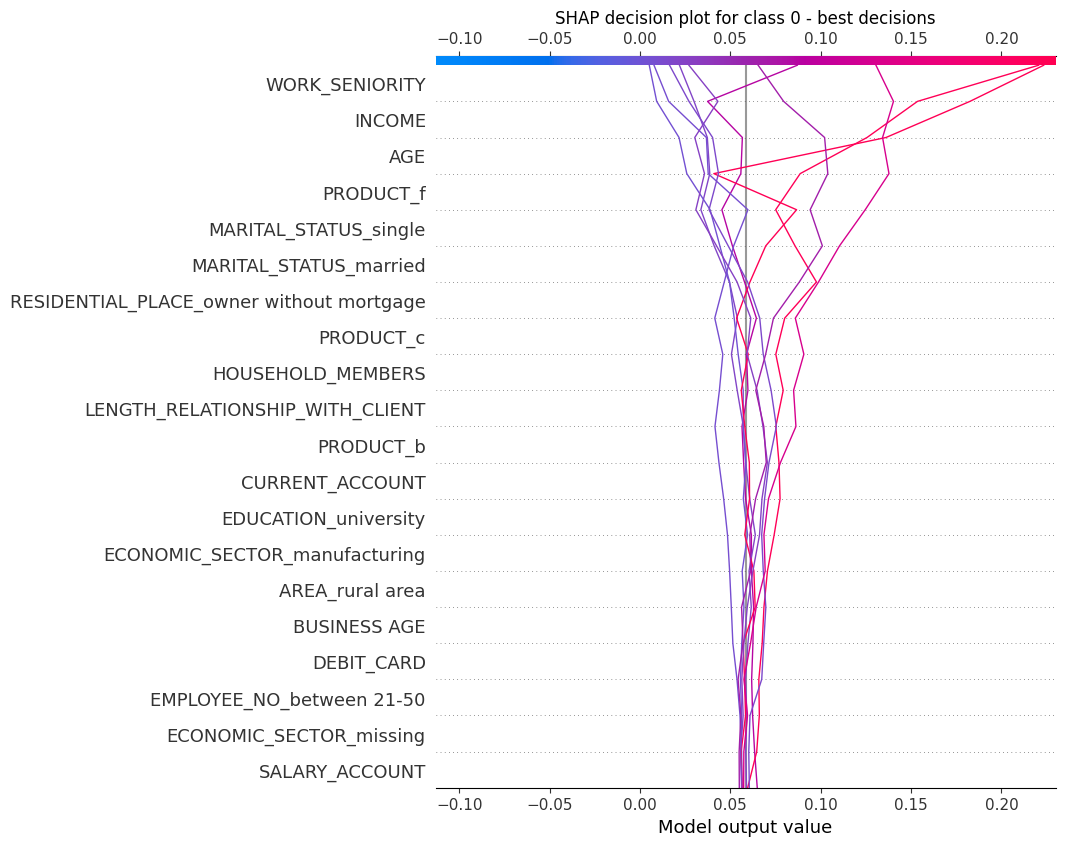

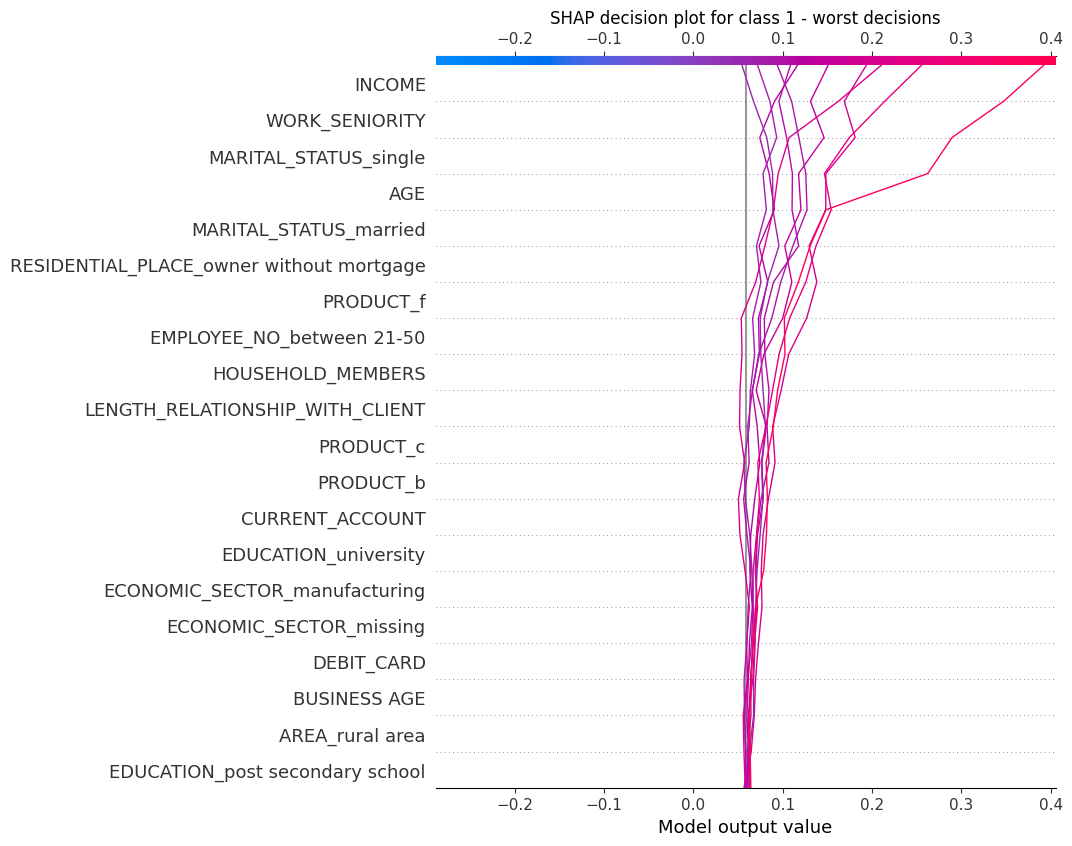

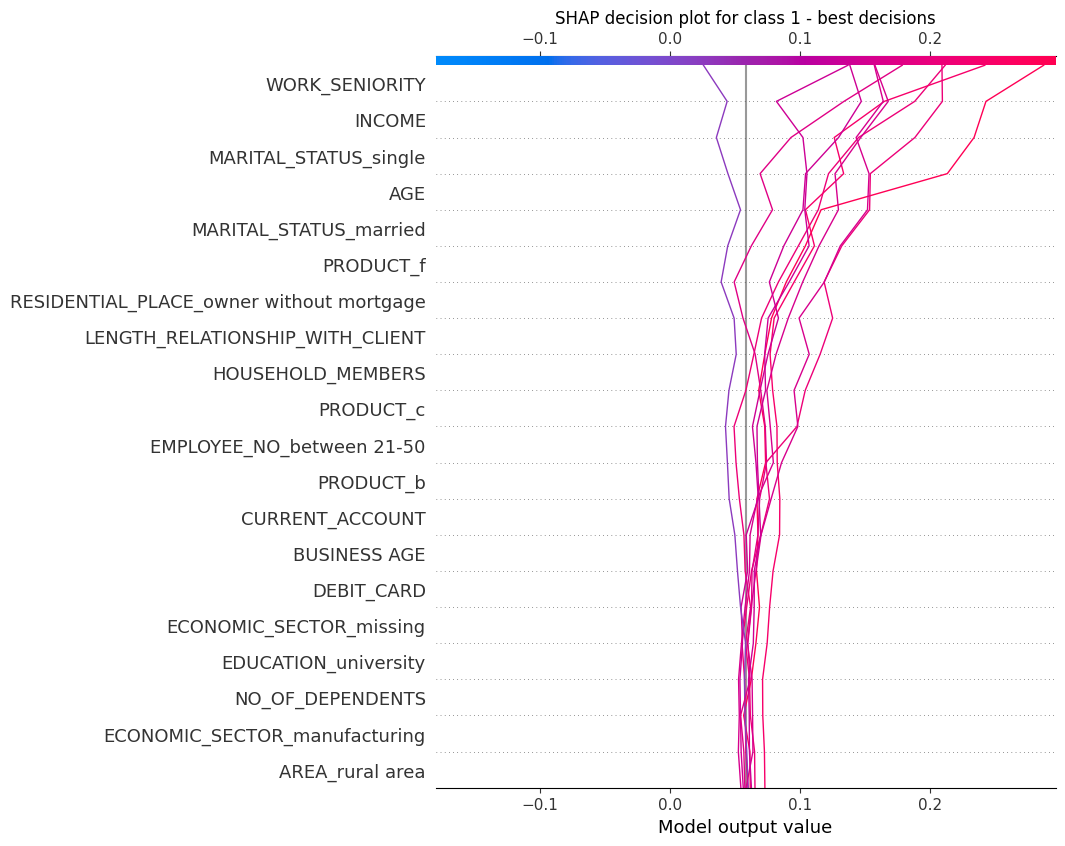

<Figure size 640x480 with 0 Axes>

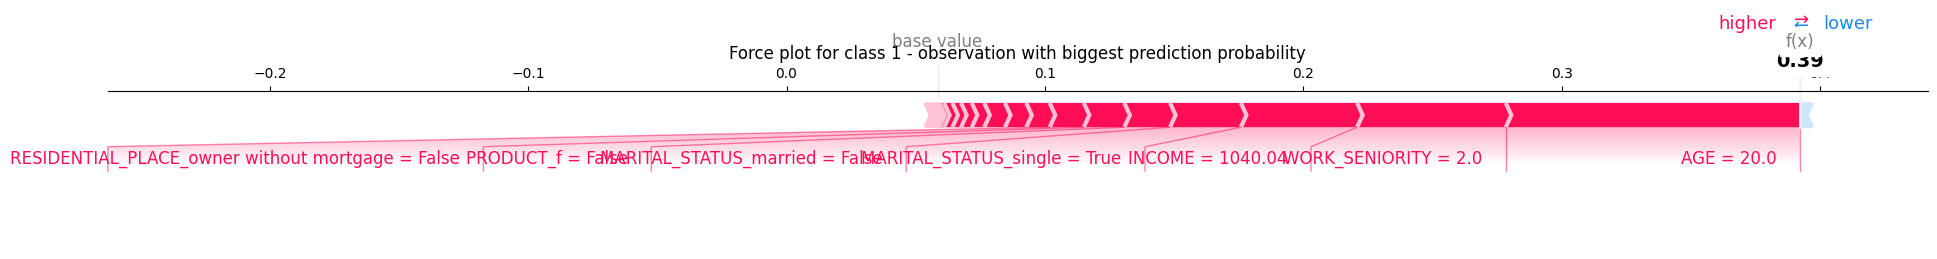

<Figure size 640x480 with 0 Axes>

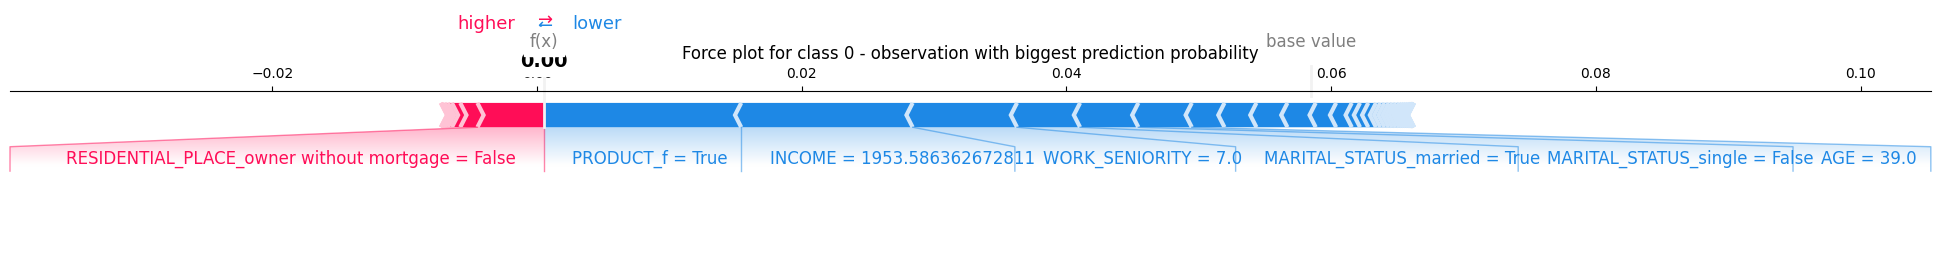


 LIME explanations:
- Each bar in the LIME plot represents the contribution of a specific feature to the prediction.
- Feature labels, such as 'feature_name < threshold' or 'feature_name > threshold', describe the range of values.
- These ranges are created by LIME's binning process, which discretizes continuous features into intervals.
- For example, 'age < 30' means that for this observation, the age being less than 30 contributes as shown.
- Bars pointing to the right (positive contributions) indicate that the feature pushes the prediction towards a positive outcome or higher value.
- Bars pointing to the left (negative contributions) indicate that the feature pulls the prediction towards a negative outcome or lower value.
- The length of the bar reflects the magnitude of the feature's influence on the model's prediction.
Local explanantions - LIME explanations for the top 2 observations most likely to be class 1 (most influential):


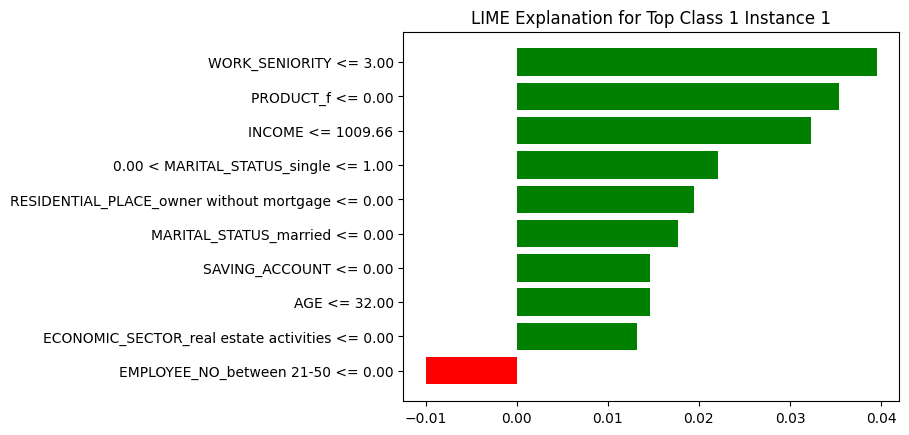

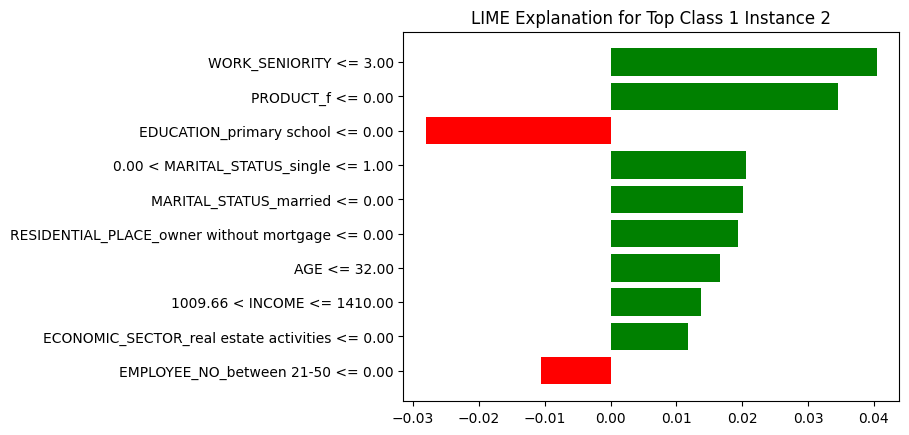

Local explanations - LIME explanations for the top 2 observations most likely to be class 0 (most influential):


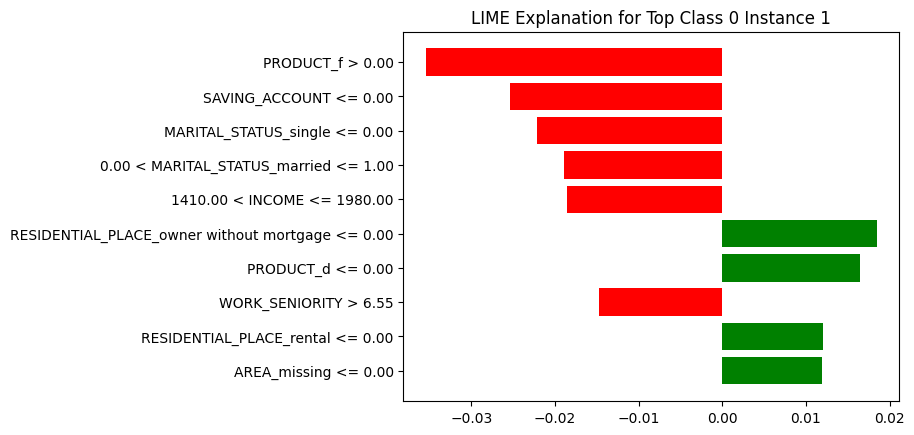

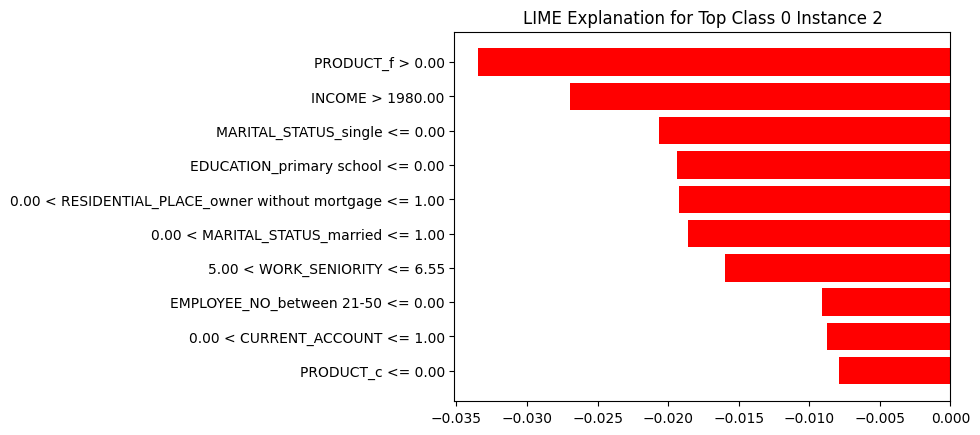


Global explanations - LIME Feature Importance of Top 15 Features:
- This plot aggregates feature importance scores across multiple observations.
- Higher bars indicate features with a stronger average influence on predictions.
- The plot helps identify which features consistently contribute the most to the model's predictions.


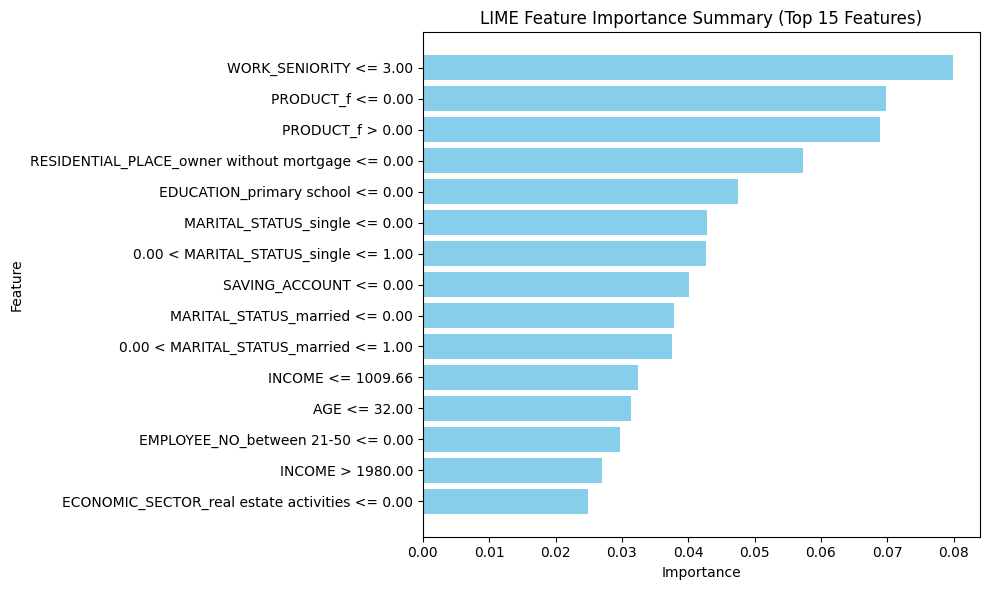

Top 3 non-binary, uncorrelated features in terms of LIME importance: ['WORK_SENIORITY', 'INCOME', 'AGE']
Displaying Partial Dependence Plots for 1 selected non-binary features...
- Partial Dependence Plots (PDPs) show the average effect of one or more features on the predicted outcome.
- The x-axis represents the values of the selected feature(s), and the y-axis represents the predicted outcome.
- PDPs help identify patterns such as linearity, thresholds, or non-linear dependencies between features and predictions.
- These plots are generated only for non-binary features that are not strongly correlated with other features.
- Avoiding correlated features ensures the interpretations are not redundant or misleading.
- These plots are useful for understanding how a specific feature influences the model's decisions, holding other features constant.
PDP plots for all uncorrelated non-binary features will be saved to the PDF.


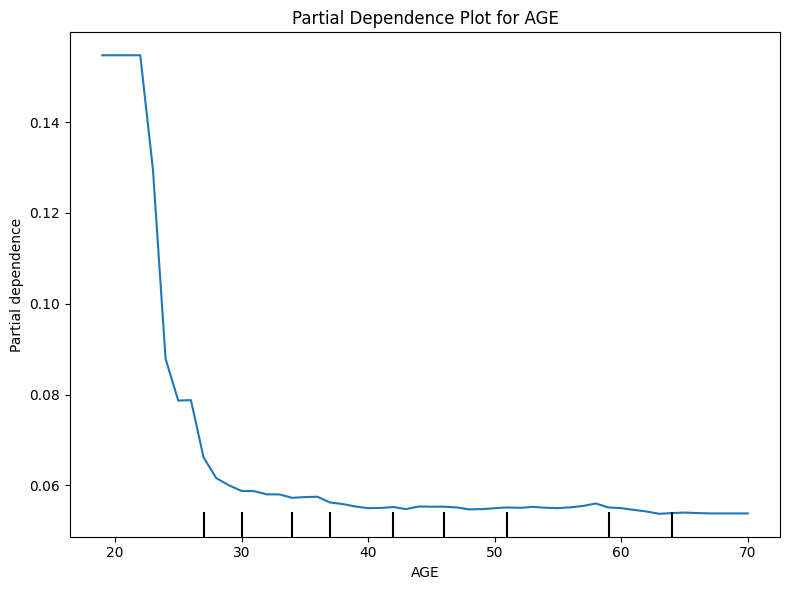

Displaying ICE plots for 1 selected non-binary features...
Using a sample of 58 observations from the input data.
- Individual Conditional Expectation (ICE) plots show how the predicted outcome changes when a single feature is varied.
- Unlike PDPs, ICE plots display individual trajectories for each observation, providing insight into heterogeneity in feature effects.
- The x-axis represents the values of the selected feature(s), and the y-axis represents the predicted outcome.
- ICE plots are generated only for non-binary features that are not strongly correlated with other features.
- This avoids redundancy and ensures clearer interpretations.
- Computational efficiency and plots readability is improved by sampling a fraction of the dataset - in this case plotted lines represents 58 observations.
- These plots are especially useful for identifying interactions and non-linear relationships in model predictions.
ICE plots for all uncorrelated non-binary features will be saved to the PD

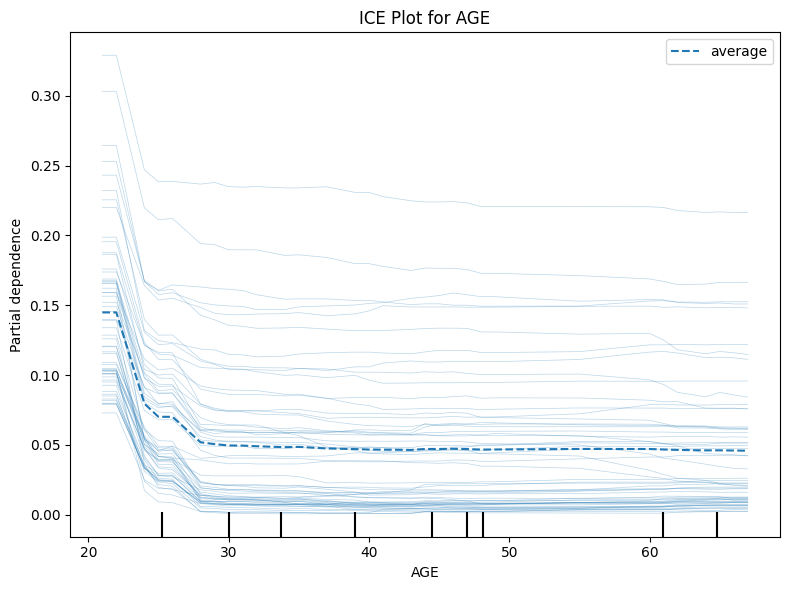

All plots have been saved to d:\STUDIA\Semestr 5\Automatyczne uczenie maszynowe\Projekt\Projekt2\AutoML-projekt-2\example\results_20250113_133219\explanations_20250113_133346\explanations_RandomForestClassifier.pdf
Postprocessing done.


In [1]:
# !pip install xgboost
# from xgboost import XGBClassifier

from autopocket import AutoPocketor
from autopocket.algorithms.base import create_wrapper
from scipy.stats import randint, uniform

# xgb_param_dist = {
#     "n_estimators": randint(100, 501),
#     "max_depth": randint(1, 31),
#     "learning_rate": uniform(0.01, 0.5),
# }
# xgb_wrapper = create_wrapper(XGBClassifier(), xgb_param_dist, 'XGB', 5)

AutoPocketor().doJob('data/credit.csv', 
                     'DEFAULT_FLAG', 
                     features_for_displaying_plots=['AGE'], 
                     subset_fraction_for_ICE_plot=0.01
                     )
                    #, additional_estimators=[xgb_wrapper])

Performing preprocessing...
Target distribution:


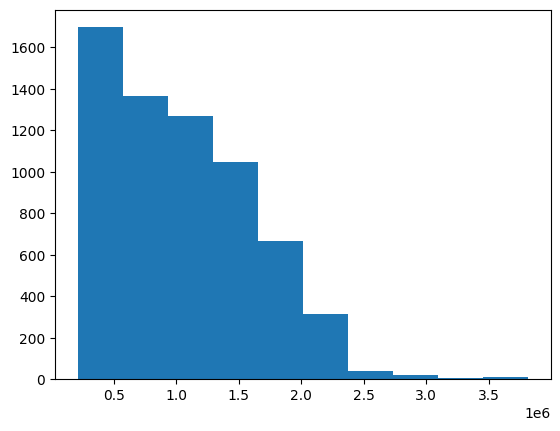

Performing BOX-COX
Target distribution after transformation:


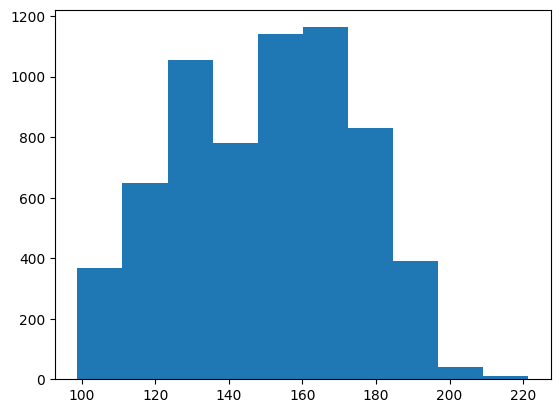

X shape: (6435, 7)
Preprocessing done.

Performing modelling...
Performing regression
Fitting dummy estimator
Dummy score (strategy: mean): -23.928191005089452 neg_root_mean_squared_error
Fitting 7 models
1 / 7  | Fitting: DecisionTreeRegressor. Best score: -30.84263501696256 neg_root_mean_squared_error
2 / 7  | Fitting: RandomForestRegressor. Best score: -24.26257387871331 neg_root_mean_squared_error
3 / 7  | Fitting: LinearRegression. Best score: -25.279024273711343 neg_root_mean_squared_error
4 / 7  | Fitting: Lasso. Best score: -24.60194090854074 neg_root_mean_squared_error
5 / 7  | Fitting: ElasticNet. Best score: -24.401931047529846 neg_root_mean_squared_error
6 / 7  | Fitting: Ridge. Ill-conditioned matrix (rcond=8.3732e-18): result may not be accurate.. Best score: -25.27102627375989 neg_root_mean_squared_error
7 / 7  | Fitting: LassoLarsIC. Best score: -25.25113262142208 neg_root_mean_squared_error
Saving results to results/algorithms_results
Chosen model: RandomForestRegresso

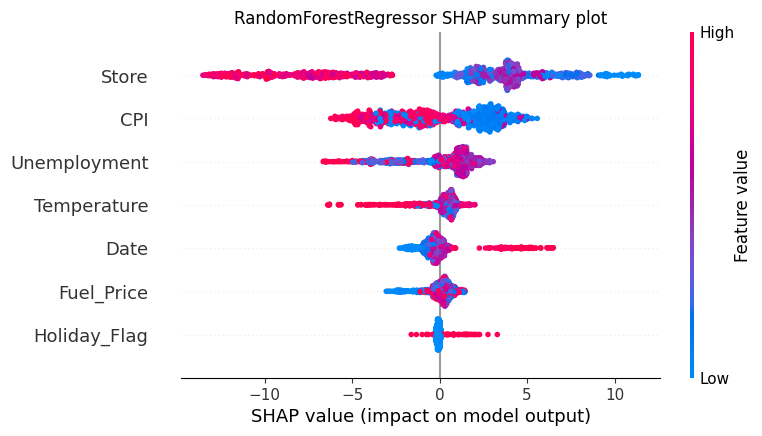

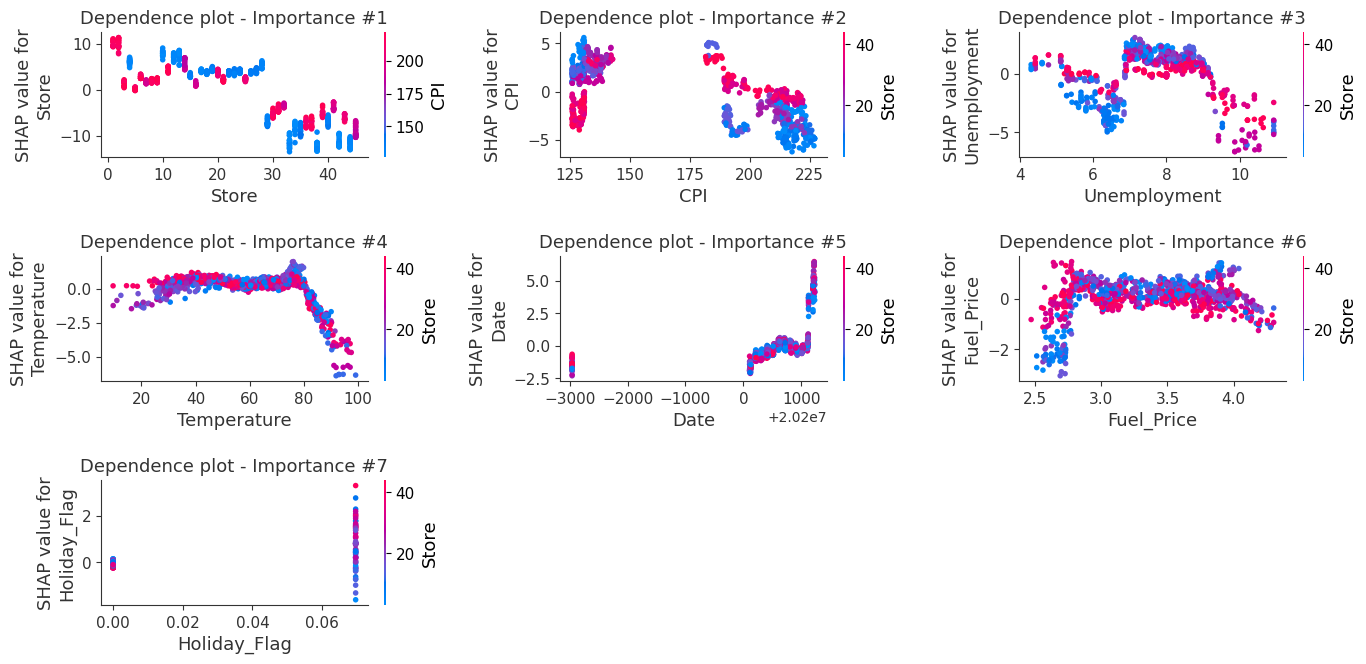

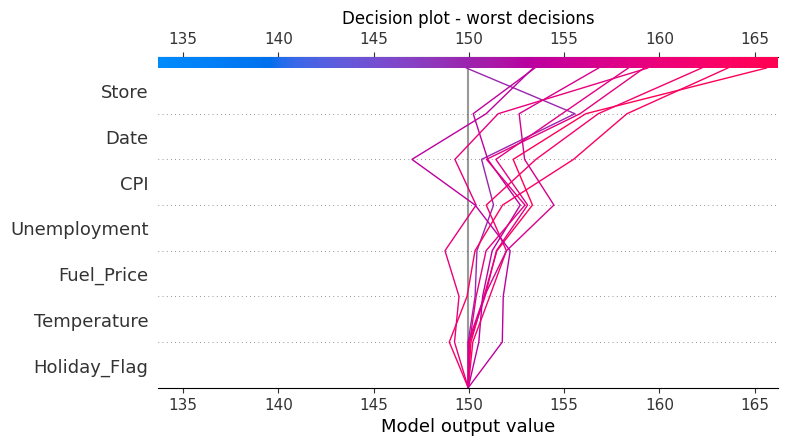

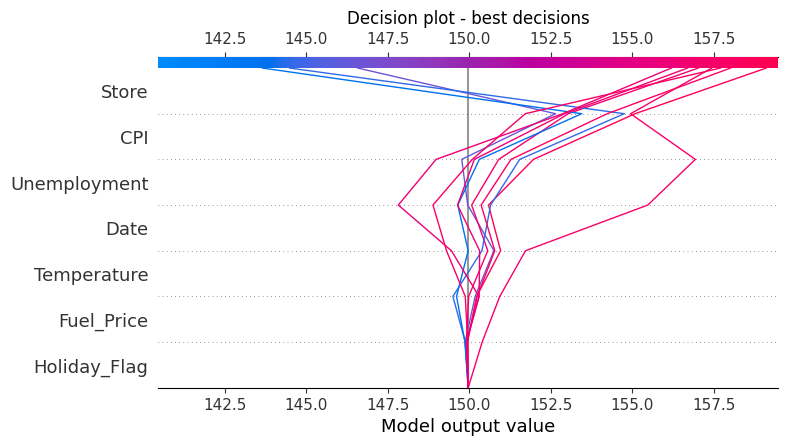


 LIME explanations:
- Each bar in the LIME plot represents the contribution of a specific feature to the prediction.
- Feature labels, such as 'feature_name < threshold' or 'feature_name > threshold', describe the range of values.
- These ranges are created by LIME's binning process, which discretizes continuous features into intervals.
- For example, 'age < 30' means that for this observation, the age being less than 30 contributes as shown.
- Bars pointing to the right (positive contributions) indicate that the feature pushes the prediction towards a positive outcome or higher value.
- Bars pointing to the left (negative contributions) indicate that the feature pulls the prediction towards a negative outcome or lower value.
- The length of the bar reflects the magnitude of the feature's influence on the model's prediction.
Local explanations - LIME explanations for the top 2 highest predictions (in terms of value of the predicted feature):


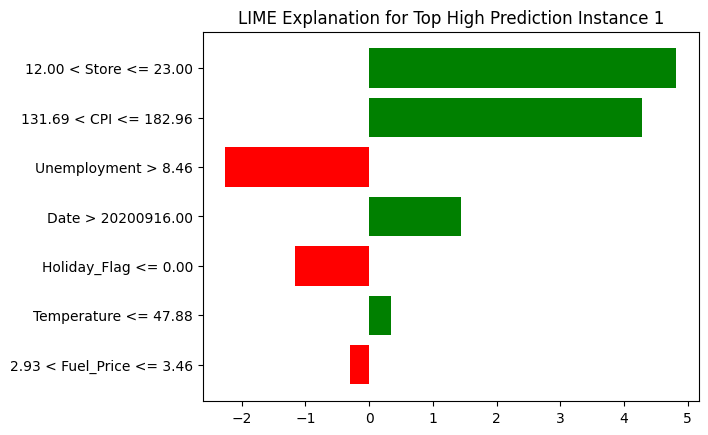

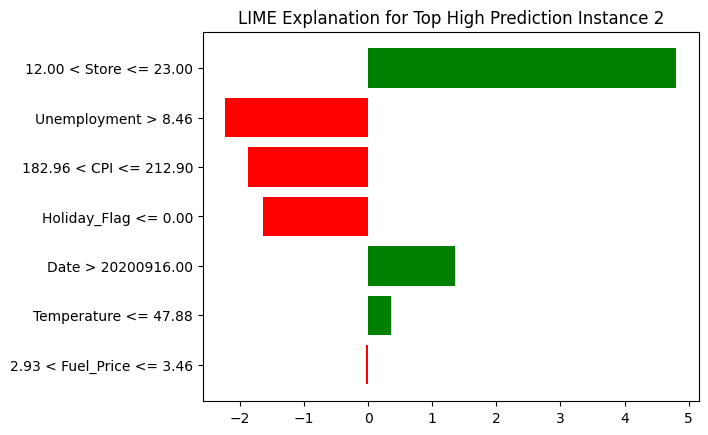

Local explanations - LIME explanations for the top 2 lowest predictions (in terms of value of the predicted feature):


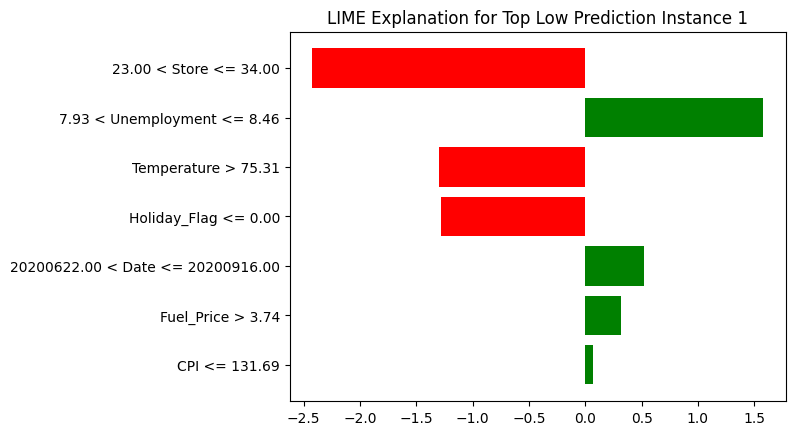

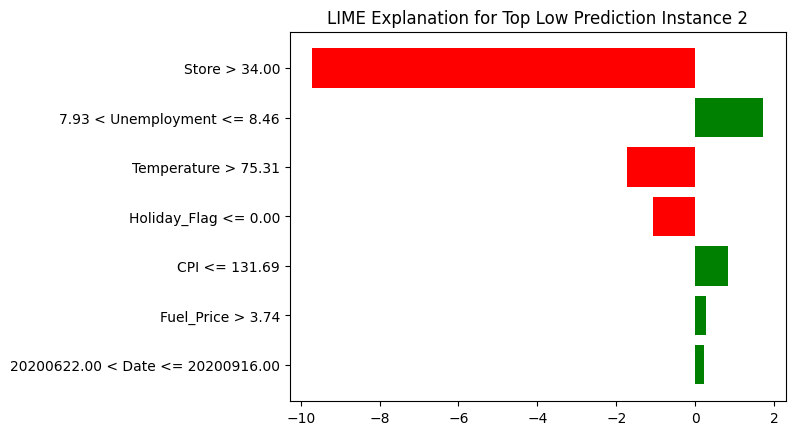


Global explanations - LIME Feature Importance of Top 15 Features:
- This plot aggregates feature importance scores across multiple observations.
- Higher bars indicate features with a stronger average influence on predictions.
- The plot helps identify which features consistently contribute the most to the model's predictions.


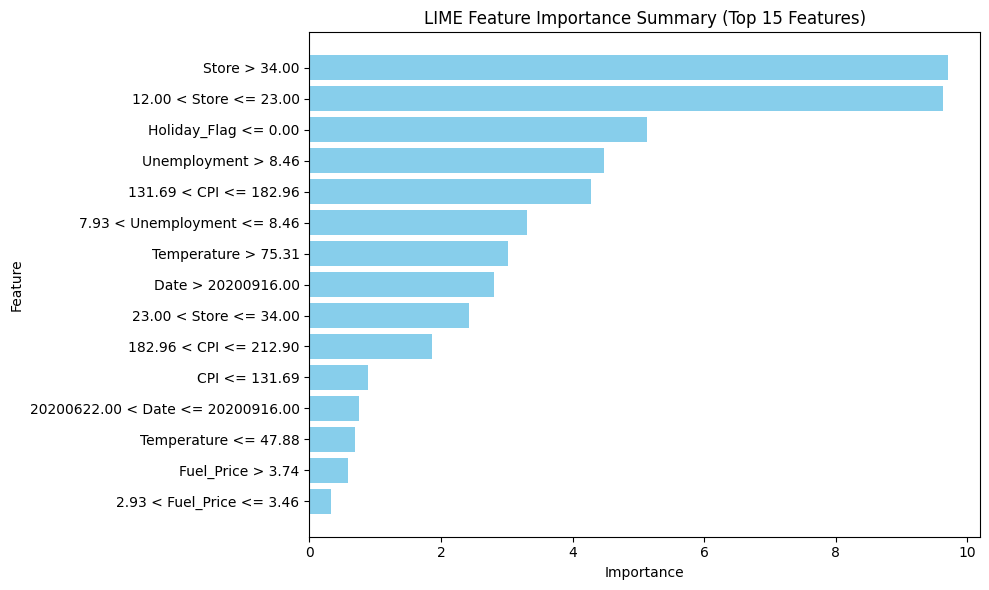

Selecting top features based on LIME Feature Importance...
Top 6 non-binary, uncorrelated features in terms of LIME importance: ['Store', 'Unemployment', 'CPI', 'Temperature', 'Date', 'Fuel_Price']
Displaying Partial Dependence Plots for top 3 non-binary features...
- Partial Dependence Plots (PDPs) show the average effect of one or more features on the predicted outcome.
- The x-axis represents the values of the selected feature(s), and the y-axis represents the predicted outcome.
- PDPs help identify patterns such as linearity, thresholds, or non-linear dependencies between features and predictions.
- These plots are generated only for non-binary features that are not strongly correlated with other features.
- Avoiding correlated features ensures the interpretations are not redundant or misleading.
- These plots are useful for understanding how a specific feature influences the model's decisions, holding other features constant.
PDP plots for all uncorrelated non-binary features will

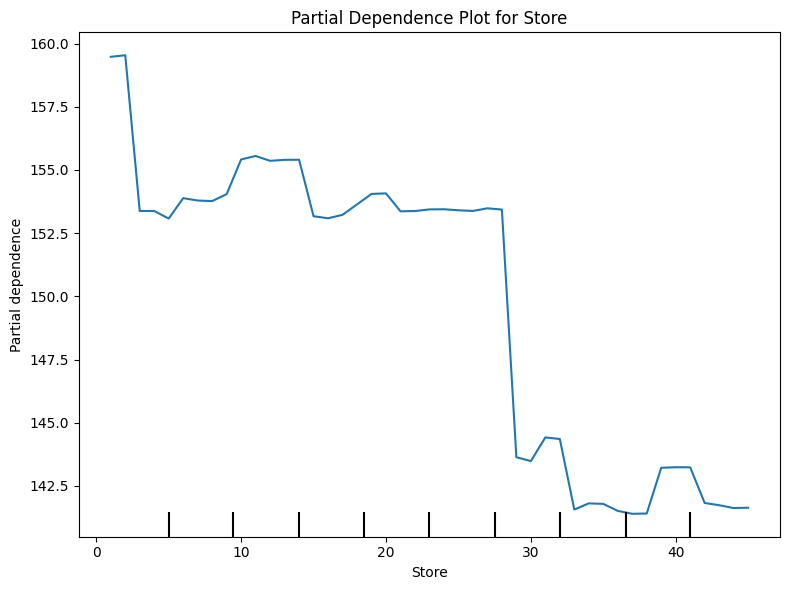

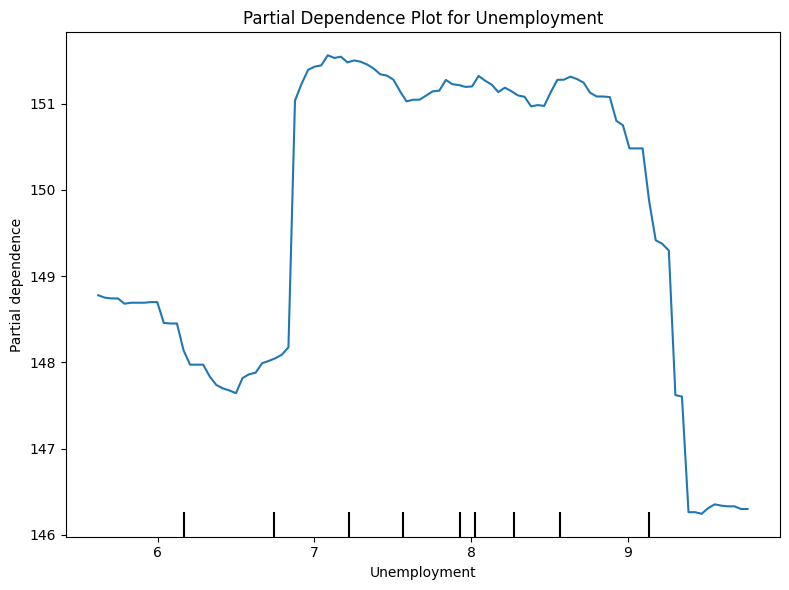

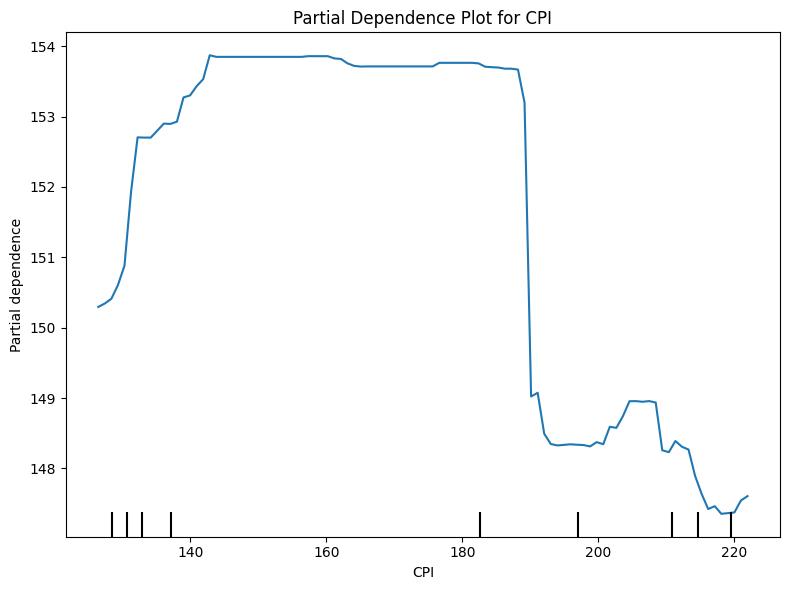

Displaying ICE plots for top 3 non-binary features...
- Individual Conditional Expectation (ICE) plots show how the predicted outcome changes when a single feature is varied.
- Unlike PDPs, ICE plots display individual trajectories for each observation, providing insight into heterogeneity in feature effects.
- The x-axis represents the values of the selected feature(s), and the y-axis represents the predicted outcome.
- ICE plots are generated only for non-binary features that are not strongly correlated with other features.
- This avoids redundancy and ensures clearer interpretations.
- All observations are used for ICE plot generation.
- These plots are especially useful for identifying interactions and non-linear relationships in model predictions.
ICE plots for all uncorrelated non-binary features will be saved to the PDF.


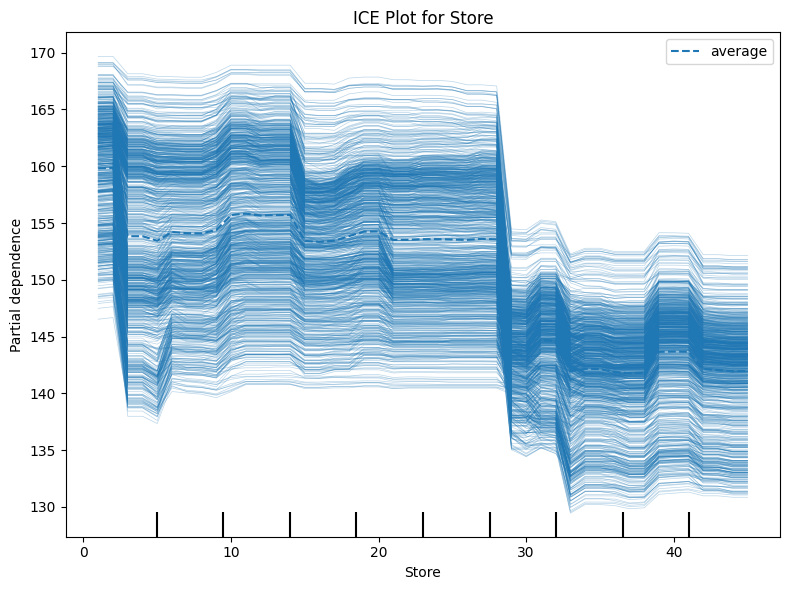

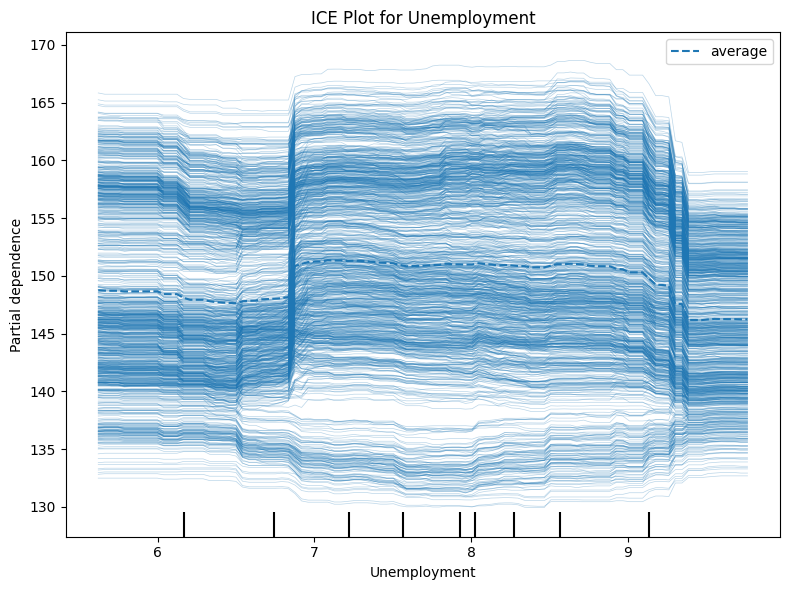

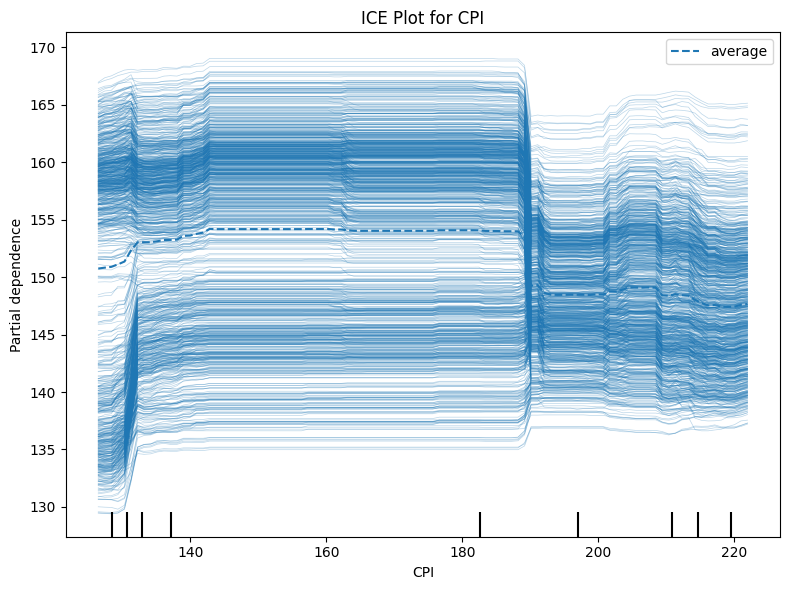

All plots have been saved to d:\STUDIA\Semestr 5\Automatyczne uczenie maszynowe\Projekt\Projekt2\AutoML-projekt-2\example\results_20250113_133521\explanations_20250113_133604\explanations_RandomForestRegressor.pdf
Postprocessing done.


In [2]:
# from xgboost import XGBRegressor

from autopocket import AutoPocketor
from autopocket.algorithms.base import create_wrapper

# xgb_param_dist = {
#     "n_estimators": randint(100, 501),
#     "max_depth": randint(1, 31),
#     "learning_rate": uniform(0.01, 0.5),
# }
# xgb_wrapper = create_wrapper(XGBRegressor(), xgb_param_dist, 'XGB', 5)

AutoPocketor().doJob('data/walmart.csv', 
                     'Weekly_Sales'
                     )
                    # , additional_estimators=[xgb_wrapper]) 